In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## import seaborn
import seaborn as sns
import pandas as pd
import warnings
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [125]:
train=pd.read_csv("bigdatamart_Train.csv")
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [126]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [127]:
train.shape

(8523, 12)

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [129]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [130]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('LF','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('low fat','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg','Regular')

In [131]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

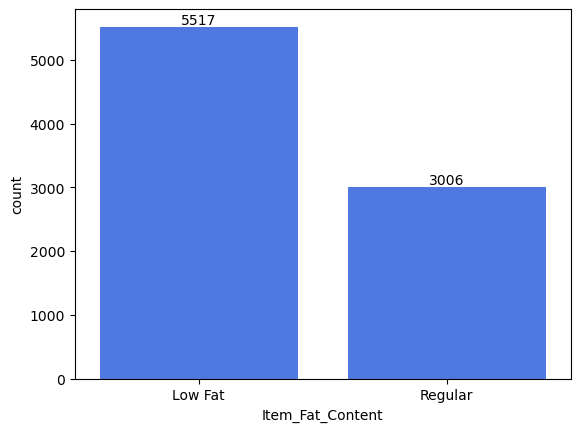

In [132]:
label=sns.countplot(x='Item_Fat_Content',data=train)
for i in label.containers:
    label.bar_label(i)

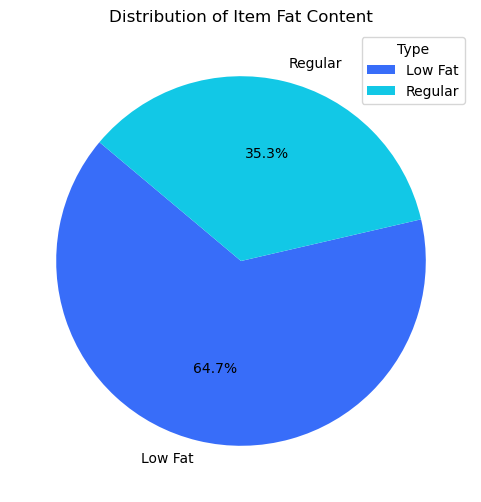

In [133]:
df1_pie = train['Item_Fat_Content'].value_counts()

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(df1_pie.values, labels=df1_pie.index, autopct='%.1f%%', startangle=140)
plt.title('Distribution of Item Fat Content')
plt.legend(title="Type", loc='upper right')  # Adding legend in the upper-right corner
plt.show()


# Item_Type and Item_Ideb=ntifier

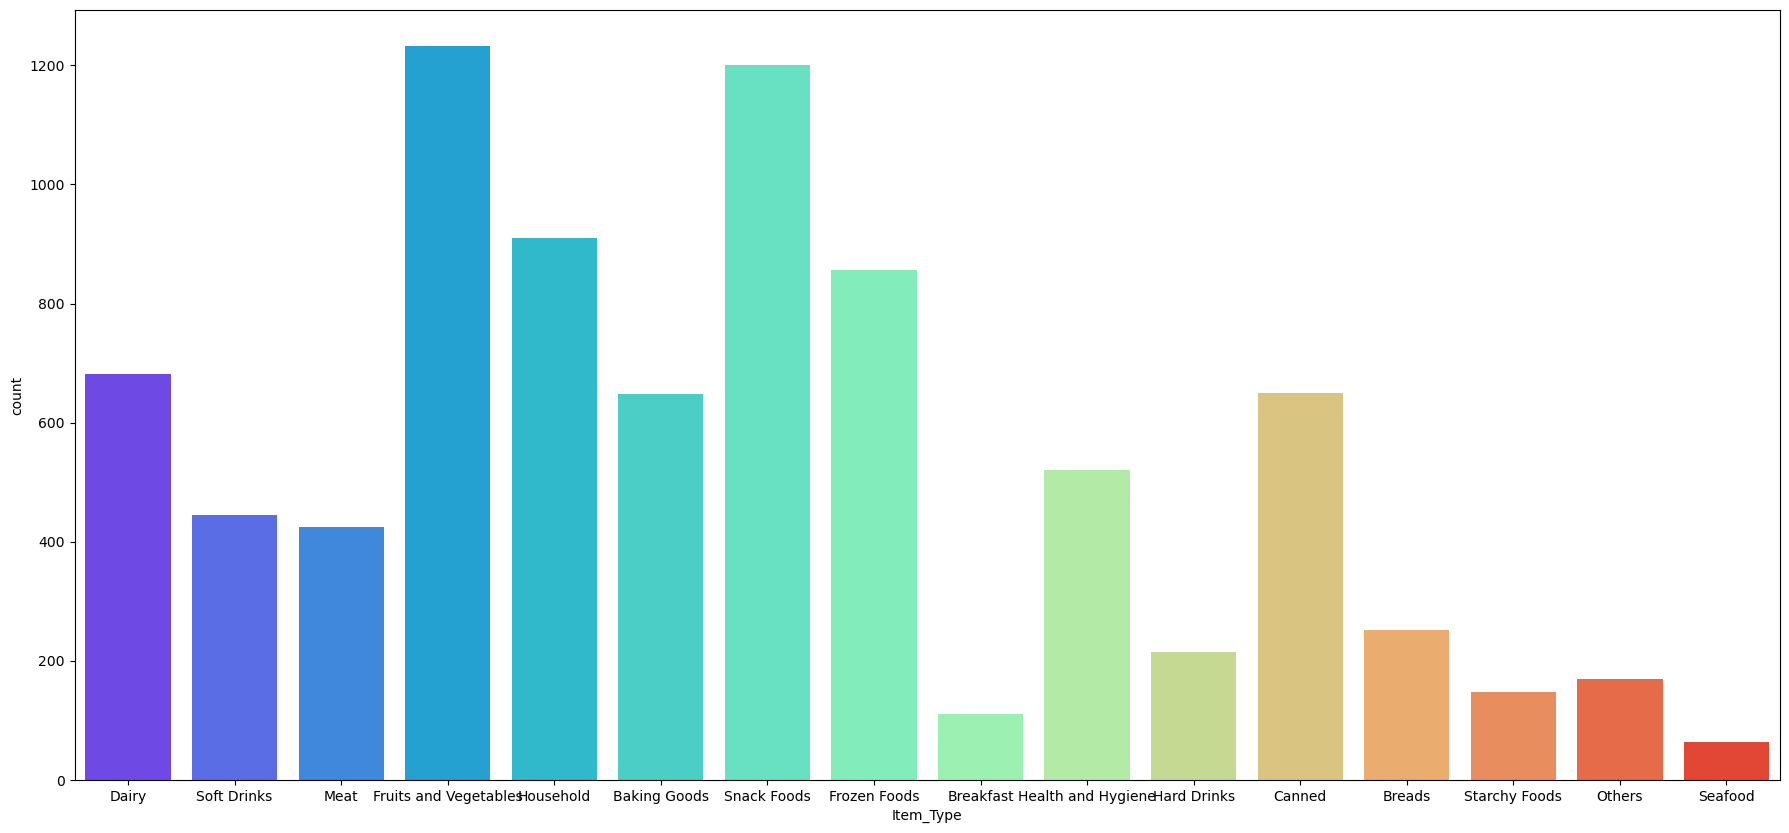

In [134]:
plt.figure(figsize=(22,10))
sns.countplot(x=train['Item_Type'],palette='rainbow')
plt.show()

In [135]:
#Item type combine:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])

train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [136]:
train.loc[train['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

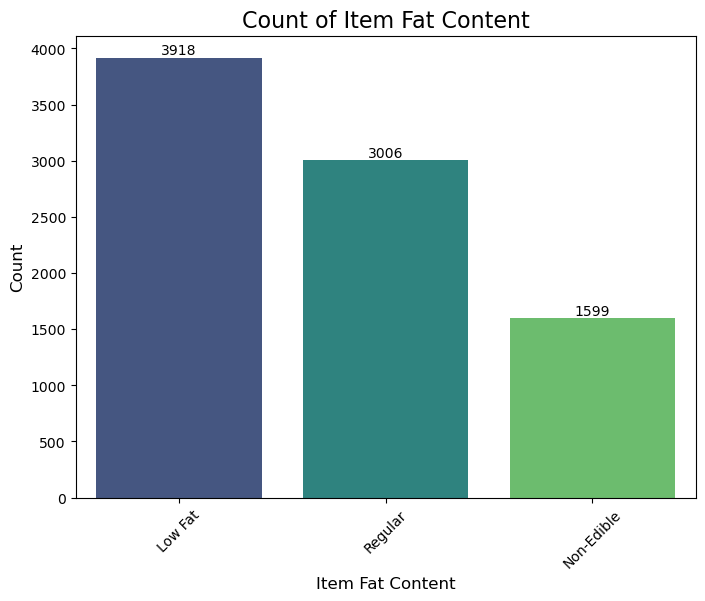

In [137]:


# Plot a count plot
plt.figure(figsize=(8, 6))
label=sns.countplot(data=train, x='Item_Fat_Content', palette='viridis')
for i in label.containers:
    label.bar_label(i)
plt.title('Count of Item Fat Content', fontsize=16)
plt.xlabel('Item Fat Content', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [138]:
train['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

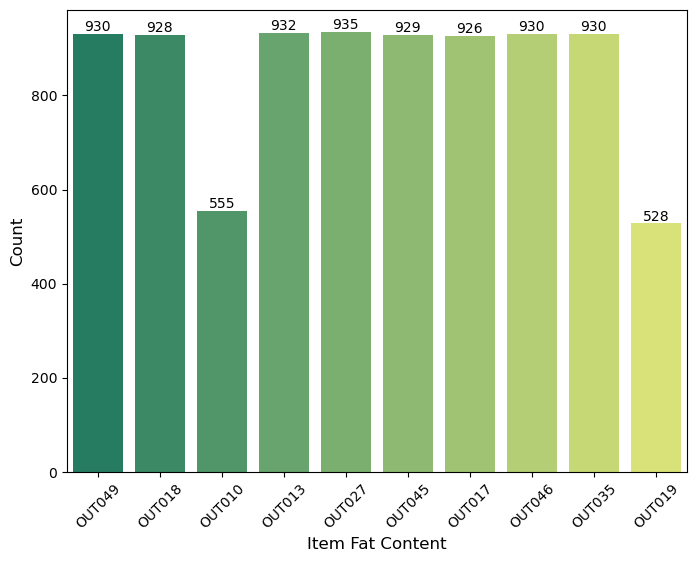

In [139]:
# Plot a count plot
plt.figure(figsize=(8, 6))
label=sns.countplot(data=train, x='Outlet_Identifier', palette='summer')
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Item Fat Content', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [140]:
train['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

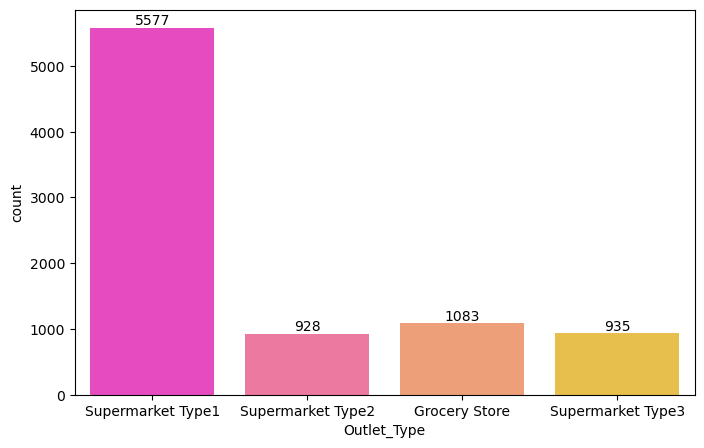

In [141]:

plt.figure(figsize=(8, 5))
label=sns.countplot(data=train, x='Outlet_Type', palette='spring')
for i in label.containers:
        label.bar_label(i)

    

In [142]:
 
train['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

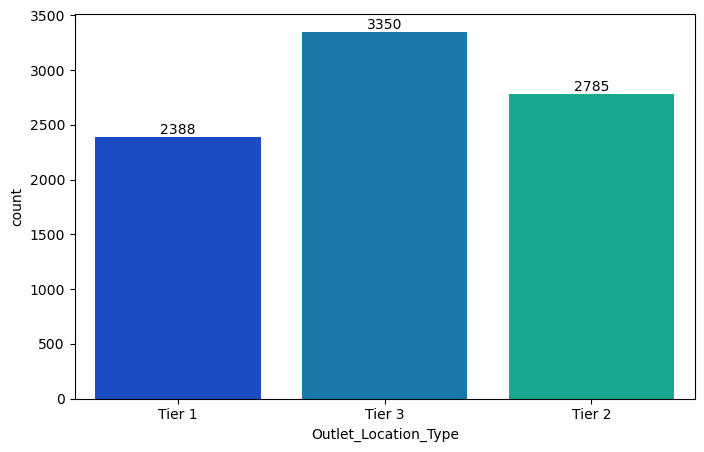

In [143]:

plt.figure(figsize=(8, 5))
label=sns.countplot(data=train, x='Outlet_Location_Type', palette='winter')
for i in label.containers:
        label.bar_label(i)

In [144]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Type_Combined              0
dtype: int64

In [145]:
train['Item_Weight'].isnull().sum()

1463

In [146]:
train.groupby("Item_Type")["Item_Weight"].value_counts(dropna=False)

Item_Type      Item_Weight
Baking Goods   NaN            112
               9.800           15
               15.500          14
               17.750          14
               9.195           12
                             ... 
Starchy Foods  10.500           3
               14.000           3
               20.500           3
               21.200           3
               18.000           1
Name: count, Length: 1197, dtype: int64

In [147]:
train['Item_Weight']=train.groupby('Item_Type')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [148]:
train['Item_Weight'].isnull().sum()

0

In [149]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [150]:
train['Outlet_Size'].isnull().sum()

2410

In [151]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)


In [152]:
train['Outlet_Size'].isnull().sum()

0

<Axes: xlabel='Outlet_Size', ylabel='count'>

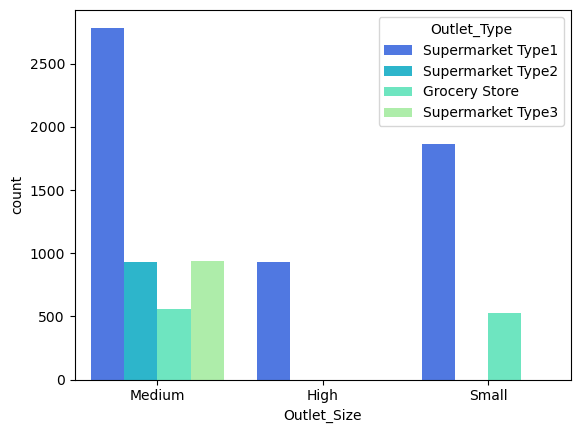

In [153]:
sns.countplot(x='Outlet_Size',hue='Outlet_Type',data=train)

# Item_Visuality

In [154]:
train[train['Item_Visibility']==0]['Item_Identifier'].nunique()

446

In [155]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,np.nan)

In [156]:
train['Item_Visibility'].fillna(train['Item_Visibility'].median(), inplace=True)


In [157]:
train[train['Item_Visibility']==0]['Item_Identifier'].nunique()

0

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

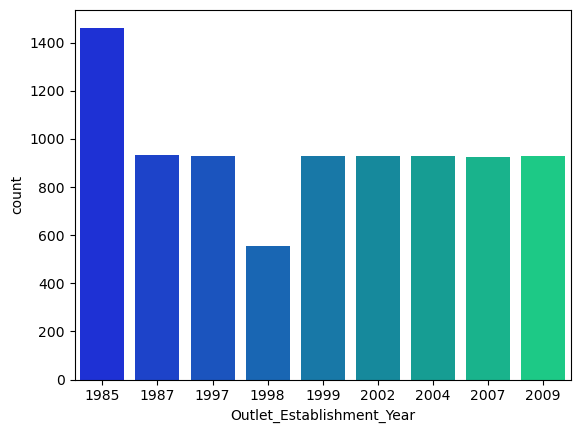

In [158]:
sns.countplot(x=train['Outlet_Establishment_Year'],palette='winter')

In [159]:
train['Outlate_Age']=train['Outlet_Establishment_Year'].apply(lambda x:2013-x)

In [160]:
train['Outlate_Age'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlate_Age, dtype: int64

In [161]:
df=train.select_dtypes(exclude='object')

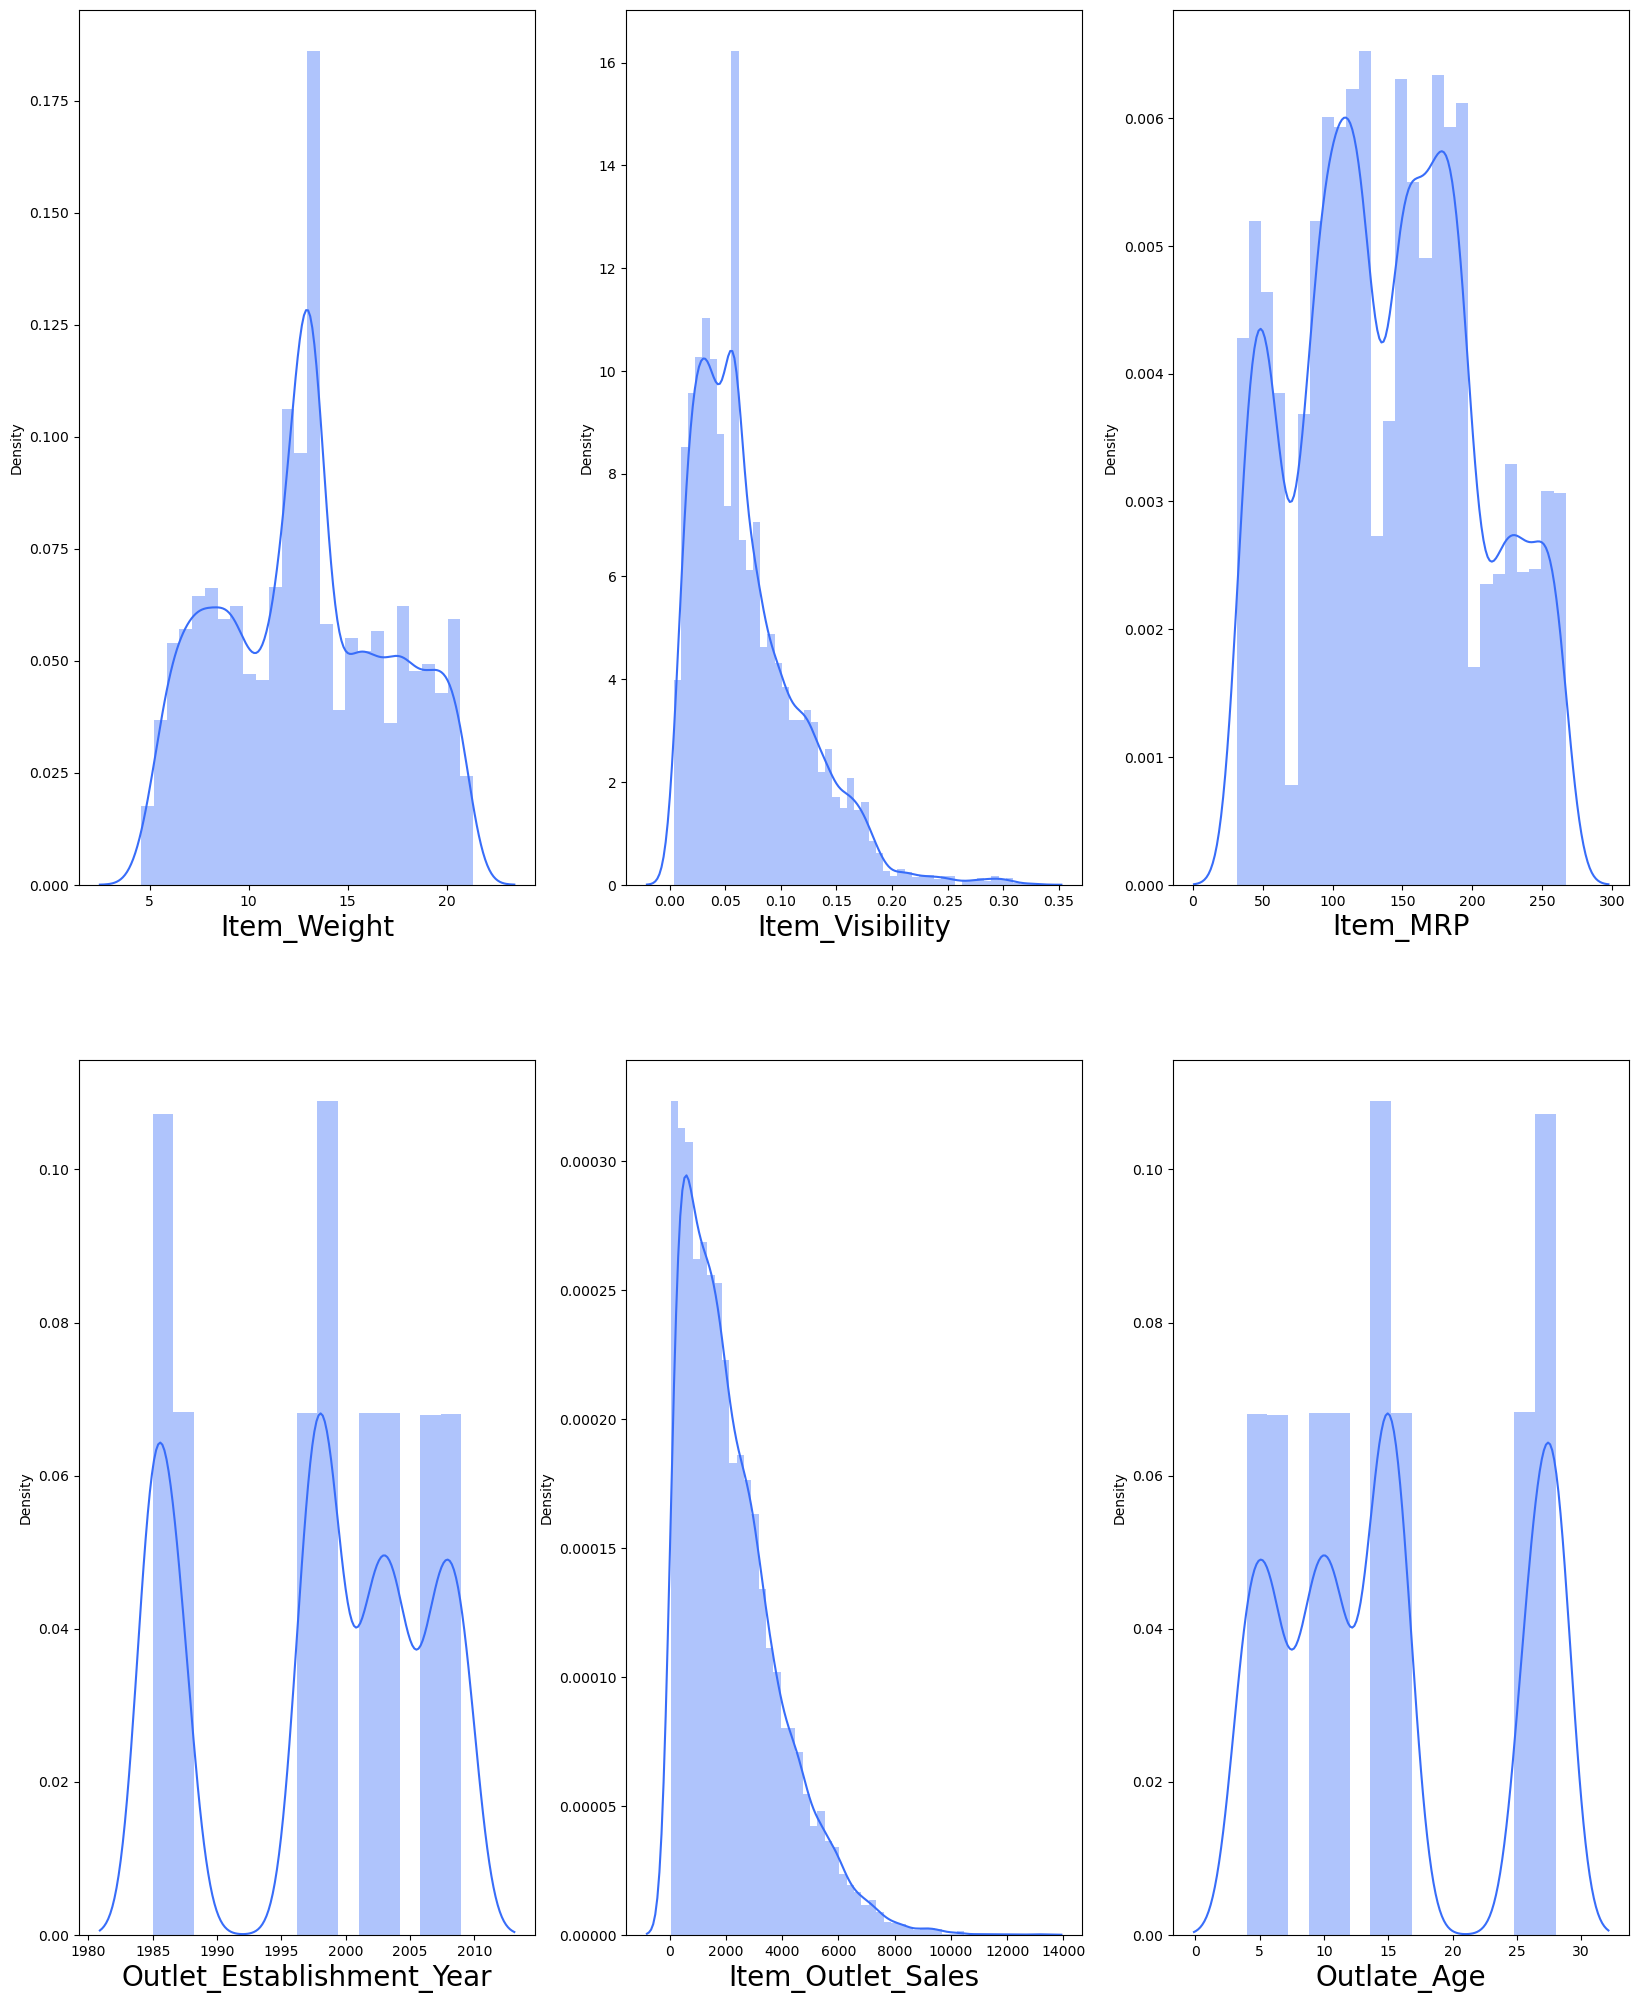

In [162]:
plt.figure(figsize=(20,25),facecolor='white')
sns.set_palette('rainbow')
plotnumber=1
for column in df:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

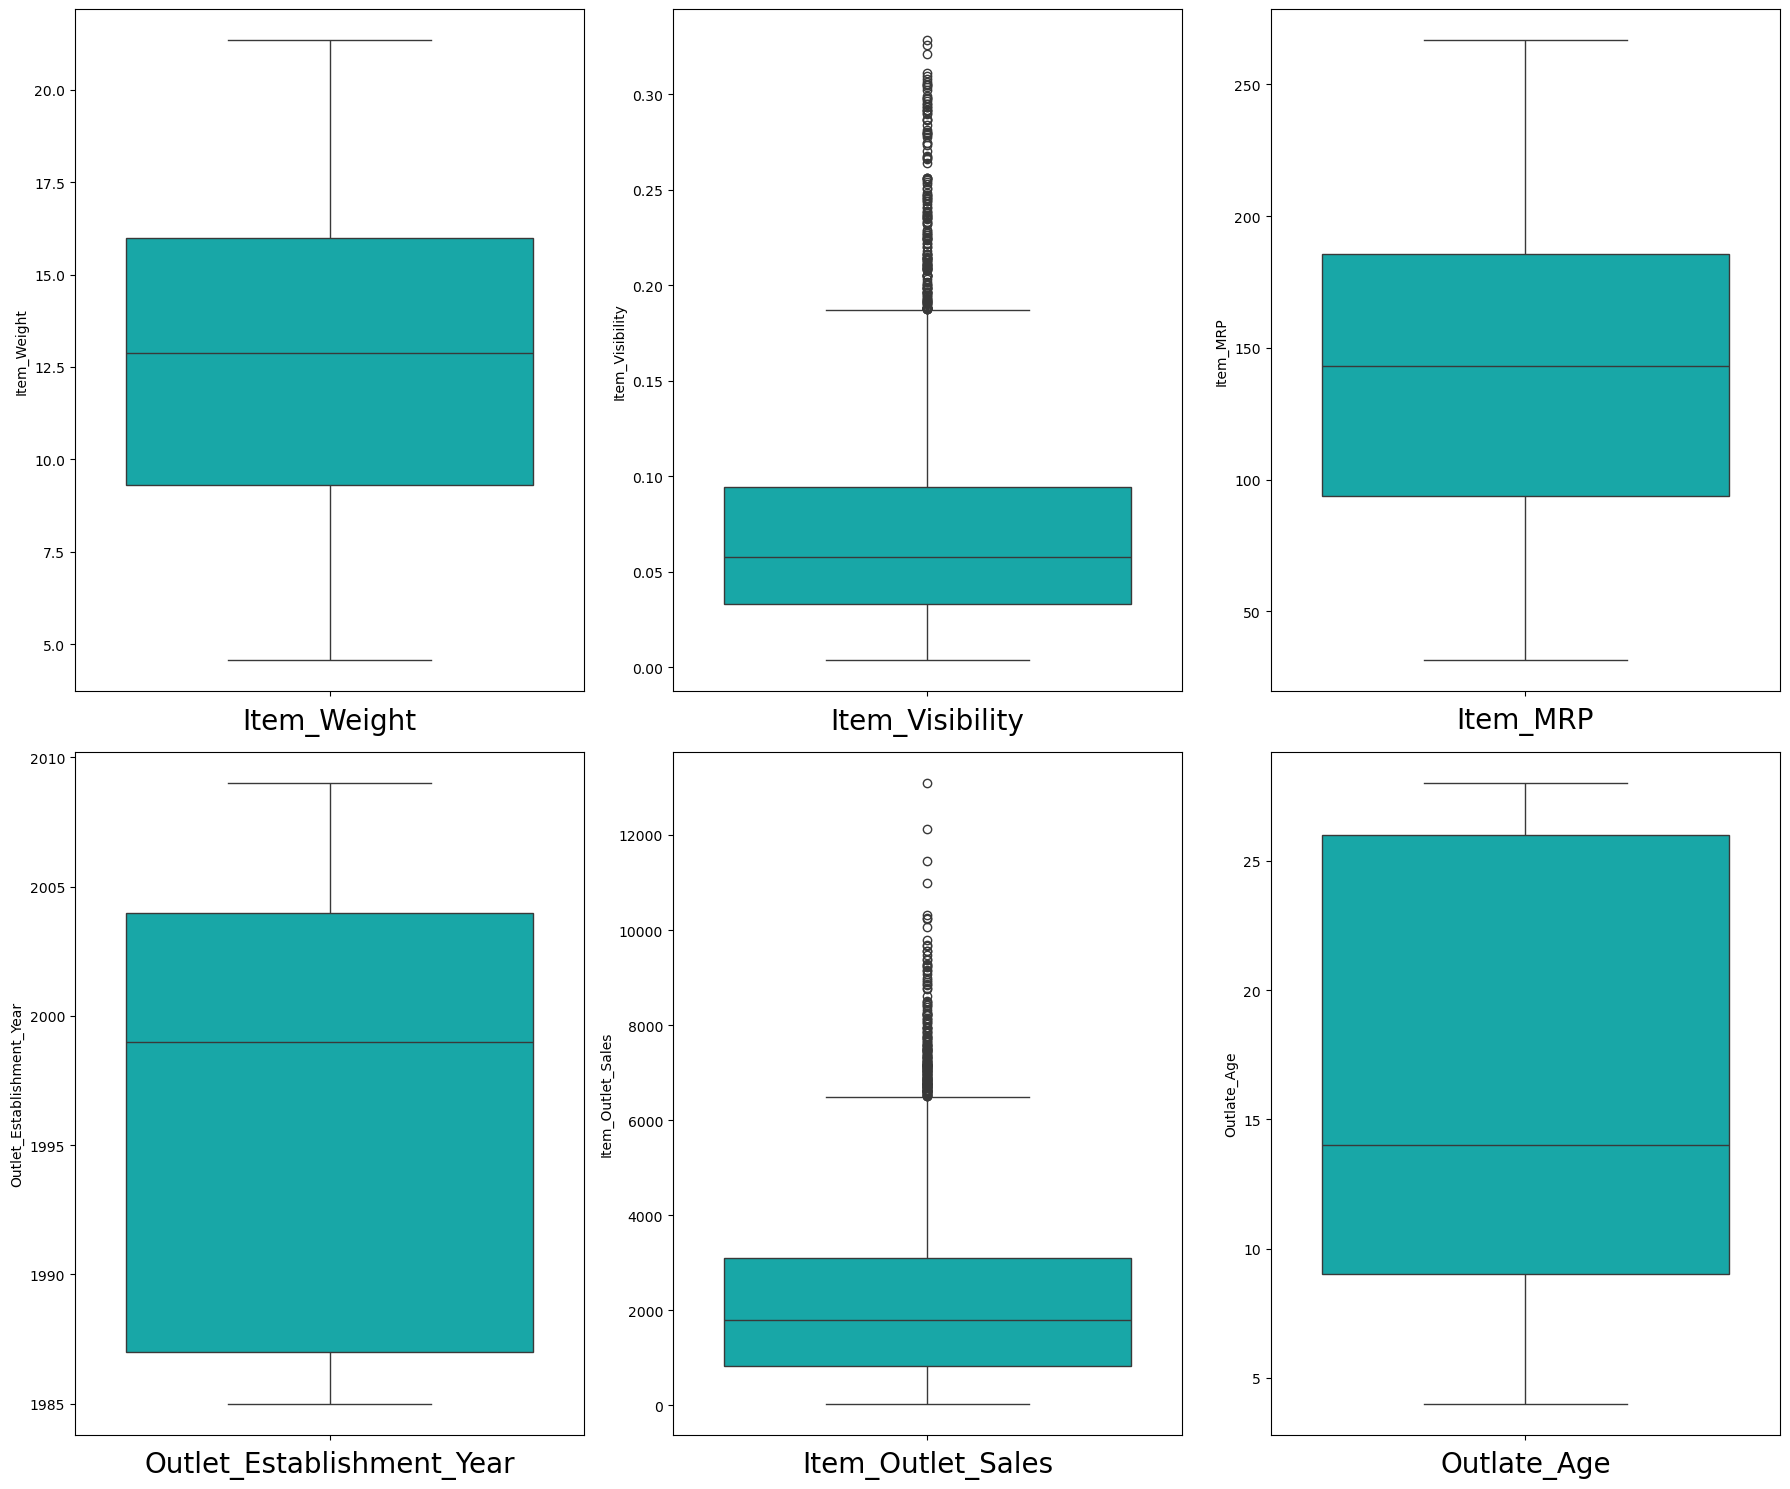

In [163]:
plt.figure(figsize=(18,15),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

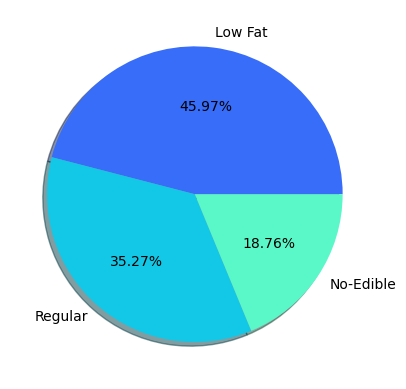

In [167]:
labels='Low Fat','Regular','No-Edible'
fig,ax=plt.subplots()
ax.pie(train.Item_Fat_Content.value_counts(),labels=labels,radius=1,autopct='%1.2F%%',shadow=True)
plt.show()

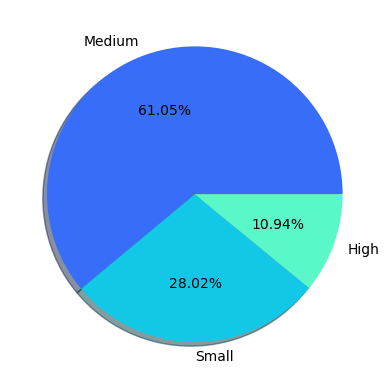

In [168]:
labels='Medium','Small','High'
fig,ax=plt.subplots()
ax.pie(train.Outlet_Size.value_counts(),labels=labels,radius=1,autopct='%1.2F%%',shadow=True)
plt.show()

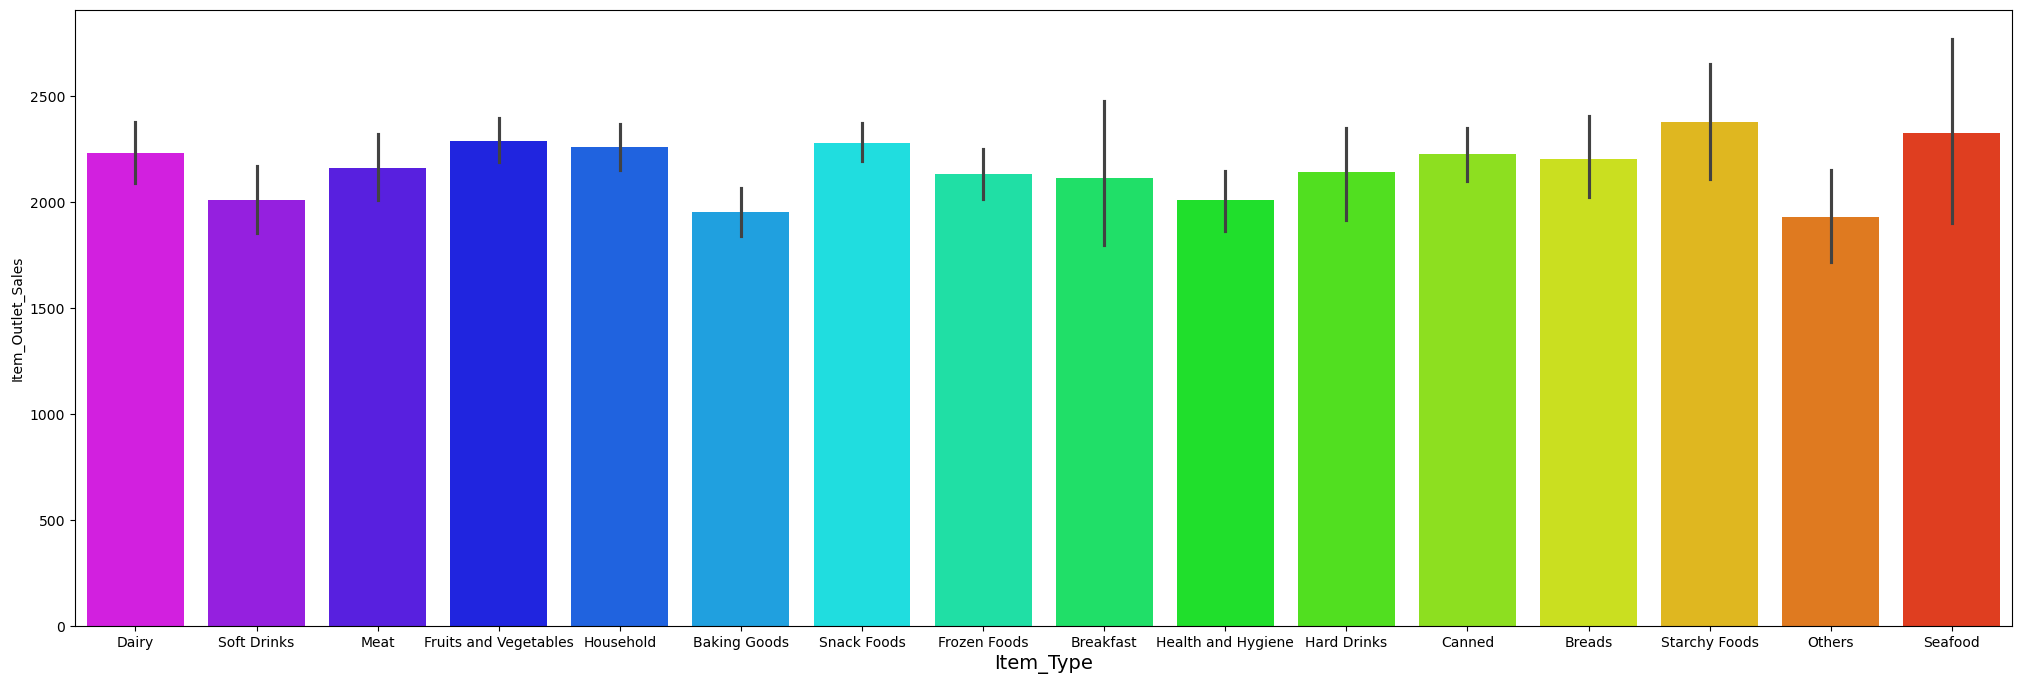

In [169]:
plt.figure(figsize=(25,8))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train,palette='gist_rainbow_r')
plt.xlabel('Item_Type',fontsize=14)
plt.show()